# Early Warning System (EWS) - Customer Churn Prediction (The Home Depot)

Customer churn is a critical challenge for any business, and for the world's largest home improvement retailer, losing valuable customers to competitors can have a substantial financial impact. When customers leave, not only does the company lose future revenue from these individuals, but it also faces higher costs in acquiring new customers to replace them. Customer retention is far more cost-effective than customer acquisition, making churn prevention a key strategic priority.

### Problem Overview

The retailer needs to develop an **early warning detection system** that can proactively monitor and analyze customer behaviour. This system will serve as a "watchman," detecting warning signs in customer purchase patterns and interactions that indicate a risk of churn. By identifying customers at risk of leaving, the company can take timely actions to retain them and preserve customer loyalty.



### Steps to Develop the Early Warning System (EWS) Model:
1. **Data Import and Initial Setup**:
   - We start by importing the required libraries: `pandas` for data manipulation and `numpy` for numerical operations.
   
   - The dataset is read from a CSV file named `cleaned_data.csv` using `pd.read_csv()`. The `DataFrame` constructor is used to wrap the dataset into a pandas DataFrame.

2. **Filtering Unknown Values**:
   - We filter out rows where the `gender` or `preferred_offer_types` columns contain the value 'Unknown'. This ensures that these columns contain only meaningful and known values.

3. **Dropping Unnecessary Columns**:
   - The column `past_complaint` is dropped using the `drop()` method with `axis=1`, as it is deemed irrelevant for further analysis.

   - Additionally, the `joining_date` column is removed, assuming it does not contribute to the objectives of the analysis.

4. **Setting the Index**:
   - We check if the `customer_id` column is unique. If it is, we set it as the index of the DataFrame using the `set_index()` method. This is important for ensuring the uniqueness of rows and for using the `customer_id` as the primary identifier.
   
   - If the `customer_id` column contains duplicate values, the script prints a warning, indicating that the index cannot be set until the duplicates are resolved.

5. **Displaying DataFrame Information**:
   - Finally, the `df.info()` method is called to provide an overview of the DataFrame's structure, including column names, data types, and non-null values.



In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('cleaned_data.csv')
pd.DataFrame(df)
df=df[df['gender']!= 'Unknown']
df=df[df['preferred_offer_types']!= 'Unknown' ]
df.drop('past_complaint', axis=1, inplace=True)
df = df.drop(columns=['joining_date'])

if df['customer_id'].is_unique:

    df.set_index('customer_id', inplace=True)

    print("Successfully set 'customer_id' as index.")

else:

    print("Cannot set 'customer_id' as index, duplicates still present.")
    
df.info()

Successfully set 'customer_id' as index.
<class 'pandas.core.frame.DataFrame'>
Index: 49844 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           49844 non-null  int64  
 1   gender                        49844 non-null  object 
 2   region_category               49844 non-null  object 
 3   membership_category           49844 non-null  object 
 4   joined_through_referral       49844 non-null  object 
 5   preferred_offer_types         49844 non-null  object 
 6   medium_of_operation           49844 non-null  object 
 7   internet_option               49844 non-null  object 
 8   days_since_last_login         49844 non-null  int64  
 9   avg_time_spent                49844 non-null  float64
 10  avg_transaction_value         49844 non-null  float64
 11  avg_frequency_login_d

In [2]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,complaint_status,feedback,churn_risk_score,dataset
customer_id,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,17.338685,230.228691,4.123106,781.75,Yes,Yes,Not Applicable,Products always in Stock,2.0,train
fffe4300490044003100390032003600,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,22.719155,145.006896,4.690416,500.69,No,Yes,Solved in Follow-up,Poor Website,5.0,train
fffe43004900440036003000330031003600,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,7.298630,158.869632,2.449490,567.66,No,Yes,Unsolved,Poor Website,5.0,train
fffe43004900440031003900350030003600,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,10.636259,156.472554,4.000000,663.06,No,Yes,Solved,Poor Website,5.0,train
fffe43004900440036003300320035003300,13,M,City,Gold Membership,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,23,20.823544,117.833654,4.898979,722.27,Yes,No,Unsolved,No reason specified,3.0,train


In [1]:
#Encoding the categorical variables using label encoding, one-hot encoding and ordinal encoding

df['gender'] = df['gender'].map({
    'M': 1,
    'F': 0,
})
df['joined_through_referral'] = df['joined_through_referral'].map({
    'Yes': 1,
    'No': 0,
})
df['used_special_discount'] = df['used_special_discount'].map({
    'Yes': 1,
    'No': 0,
})
df['offer_application_preference'] = df['offer_application_preference'].map({
    'Yes': 1,
    'No': 0,
})

df=pd.get_dummies(df, columns=['region_category'])
df=pd.get_dummies(df, columns=['preferred_offer_types'])
df=pd.get_dummies(df, columns=['internet_option'])
df=pd.get_dummies(df, columns=['complaint_status'])

from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[['No Membership', 'Basic Membership','Silver Membership','Gold Membership','Platinum Membership','Premium Membership']])

# Apply the encoder and ensure the result is in integer format
df['membership_category_encoded'] = encoder.fit_transform(df[['membership_category']]).astype(int)

df.drop('membership_category', axis=1, inplace=True)

df['medium_smartphone'] = df['medium_of_operation'].map({
    'Smartphone': 1,
    'Desktop': 0,
    'Both': 1,
    'Unknown': 0
})

df['medium_desktop'] = df['medium_of_operation'].map({
    'Smartphone': 0,
    'Desktop': 1,
    'Both': 1,
    'Unknown': 0
})

df.drop('medium_of_operation', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'feedback' column
df['feedback'] = label_encoder.fit_transform(df['feedback'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(label_mapping)

df.head()

NameError: name 'df' is not defined

### Code Overview

This script is focused on visualizing the correlation between various features of customers with a **churn risk score of 0** (i.e., those who are not at risk of churn) using a **heatmap**. The correlation matrix is used to understand the relationships between different variables, which can help identify important factors related to customer behavior and churn.

### Code Explanation

1. **Import Libraries**:
   - `seaborn` (imported as `sns`) is used for data visualization, specifically for generating the heatmap.

   - `matplotlib.pyplot` (imported as `plt`) is used to control figure size and display the plot.

2. **Filter the Data**:
   - `df_filtered = df[df['churn_risk_score']==0]` filters the original DataFrame (`df`) to include only customers whose churn risk score is 0, focusing on customers who are not currently at risk of leaving.

3. **Select Columns for Correlation Analysis**:
   - A subset of relevant columns is selected in the list `columns_for_correlation`, which includes variables like `avg_transaction_value`, `points_in_wallet`, `membership_category_encoded`, and others.

   - This subset is intended to capture features that are related to customer engagement, transaction behavior, and offer preferences.

4. **Correlation Matrix Calculation**:
   - The `corr()` function is used on the filtered DataFrame to compute the pairwise correlation between the selected columns. The correlation values range from -1 to 1, where:

     - **1** indicates a perfect positive correlation,

     - **-1** indicates a perfect negative correlation,

     - **0** indicates no correlation.

5. **Plotting the Heatmap**:
   - A **heatmap** is generated using `sns.heatmap()` with the correlation matrix as input.
   
The resulting heatmap will help uncover any strong correlations between these features, providing insight into customer behavior for those with a churn risk score of 0.

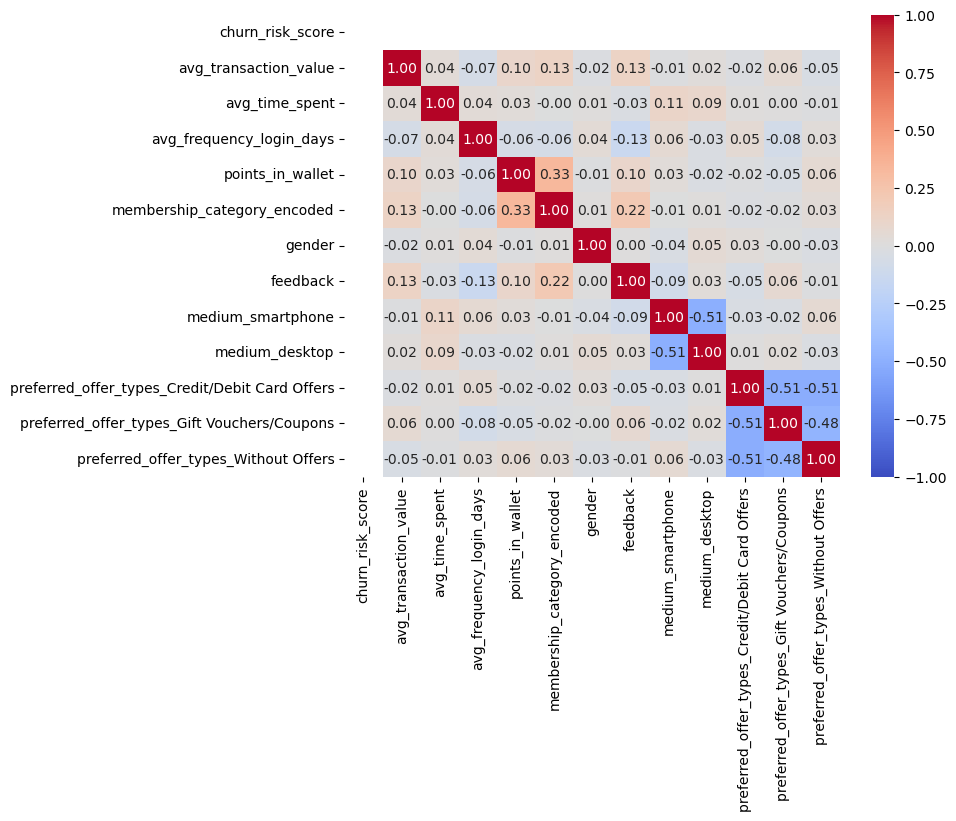

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['churn_risk_score']==0]

# Select the relevant columns for correlation
columns_for_correlation = ['churn_risk_score','avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days','points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix for the filtered data
correlation_matrix = df_filtered[columns_for_correlation].corr()

# Print the correlation matrix
#print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [5]:
# Removing all rows with 'churn_risk_score' as 0
df=df[df['churn_risk_score']!= 0]
df[df['churn_risk_score'] == 0]['churn_risk_score']


Series([], Name: churn_risk_score, dtype: float64)

In [6]:
####REMOVE THIS CODE 
new_values = df['churn_risk_score'].map({
    
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5
})

# Update the DataFrame, ensuring original values remain for non-mapped entries
df['churn_risk_score'] = new_values.where(new_values.notna(), df['churn_risk_score'])
df.head()

,age,gender,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,...,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,membership_category_encoded,medium_smartphone,medium_desktop
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,0,17,17.338685,230.228691,4.123106,781.75,1,1,...,0,1,0,1,0,0,0,4,0,0
fffe4300490044003100390032003600,44,0,1,14,22.719155,145.006896,4.690416,500.69,0,1,...,0,1,0,0,0,1,0,0,0,1
fffe43004900440036003000330031003600,37,1,1,11,7.298630,158.869632,2.449490,567.66,0,1,...,1,0,0,0,0,0,1,0,0,1
fffe43004900440031003900350030003600,31,0,0,20,10.636259,156.472554,4.000000,663.06,0,1,...,1,0,0,0,1,0,0,0,1,0
fffe43004900440036003300320035003300,13,1,0,23,20.823544,117.833654,4.898979,722.27,1,0,...,0,1,0,0,0,0,1,3,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48827 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             48827 non-null  int64  
 1   gender                                          48827 non-null  int64  
 2   joined_through_referral                         48827 non-null  int64  
 3   days_since_last_login                           48827 non-null  int64  
 4   avg_time_spent                                  48827 non-null  float64
 5   avg_transaction_value                           48827 non-null  float64
 6   avg_frequency_login_days                        48827 non-null  float64
 7   points_in_wallet                                48827 non-null  float64
 8   used_special_discount                           48827 non-n

In [8]:
df = df.drop(columns=['dataset'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48827 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             48827 non-null  int64  
 1   gender                                          48827 non-null  int64  
 2   joined_through_referral                         48827 non-null  int64  
 3   days_since_last_login                           48827 non-null  int64  
 4   avg_time_spent                                  48827 non-null  float64
 5   avg_transaction_value                           48827 non-null  float64
 6   avg_frequency_login_days                        48827 non-null  float64
 7   points_in_wallet                                48827 non-null  float64
 8   used_special_discount                           48827 non-n

### Code Overview

This is designed to visualize the distribution of key numerical features in the dataset, both before and after applying a **square root transformation**. The square root transformation is often used to reduce the skewness of a distribution, making the data more normally distributed. The script is divided into two main parts: plotting the histograms of the original data and then visualizing the transformed data.

1. **Reverse Square Root Transformation**:
   - The first three lines reverse any prior square root transformation by squaring the values in the columns `avg_time_spent`, `avg_transaction_value`, and `avg_frequency_login_days`. This restores the original scale of these features, which is useful for visualizing their original distribution.

2. **Numerical Columns for Visualization**:
   - The list `numerical_columns` contains six numerical features to be plotted, including columns like `age`, `days_since_last_login`, `avg_transaction_value`, and others. These features are important for understanding customer behavior and engagement patterns.

3. **Plot Histograms for Original Data**:
   - The script generates a series of histograms for each feature in the `numerical_columns` list:
     - A subplot grid of size 2x3 is created using `plt.subplot()`.
     - `sns.histplot()` is used to plot the distribution of each column, with a **kernel density estimate (KDE)** overlaid to show the probability density of the values.
     - The `bins=30` parameter ensures 30 bins in the histogram, and the axis labels and titles are customized for clarity.
     - `plt.tight_layout()` ensures that the subplots are neatly arranged without overlapping.
     - The result is a set of histograms that display the distribution of the original numerical features.

4. **Square Root Transformation**:
   - The columns `avg_frequency_login_days`, `avg_transaction_value`, and `avg_time_spent` are selected for a square root transformation. This transformation helps reduce skewness, especially in features where values vary widely or where many values are close to zero.
   - The transformation is applied using the `np.sqrt()` function with the `apply()` method, which modifies the original DataFrame (`df`) by taking the square root of each value in the selected columns.

5. **Plot Histograms for Transformed Data**:
   - After applying the square root transformation, the script generates histograms for each transformed column, again using `sns.histplot()` to visualize the new distributions.
   - The titles and labels for each plot indicate that the data has been square root transformed. This helps in comparing the pre-transformation and post-transformation distributions.

6. **Visualization**:
   - By comparing the histograms before and after the square root transformation, it becomes possible to see how the transformation affects the distribution of the data. Specifically, the transformation should reduce skewness and make the distributions more symmetric, which can improve model performance in some machine learning algorithms.

### Summary

This script provides a clear comparison between the original and square root transformed data for several key numerical features. The transformation helps in normalizing data distributions, which can be beneficial for modeling and analysis tasks.

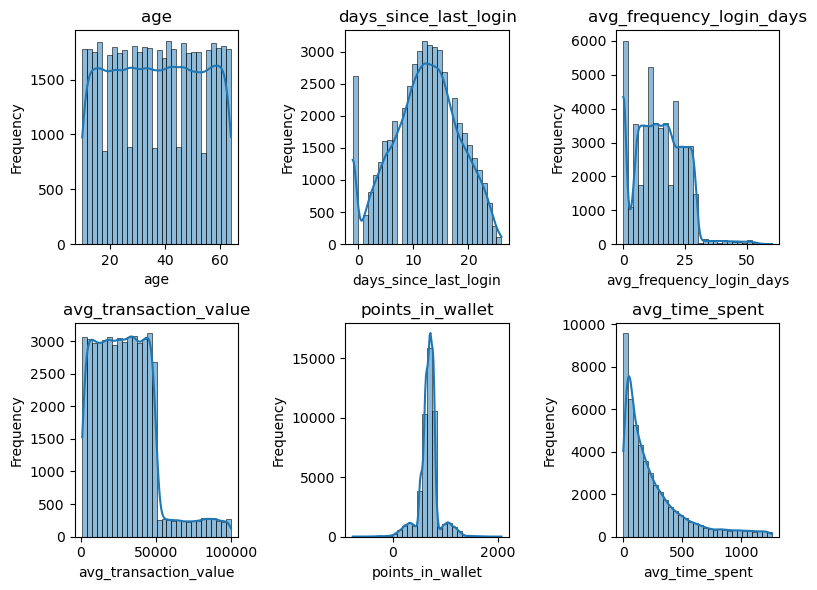

In [9]:
import numpy as np

# Reverse square root transformation by squaring the values in each column
df['avg_time_spent'] = df['avg_time_spent'] ** 2
df['avg_transaction_value'] = df['avg_transaction_value'] ** 2
df['avg_frequency_login_days'] = df['avg_frequency_login_days'] ** 2

numerical_columns = [
    'age', 
    'days_since_last_login', 
    'avg_frequency_login_days', 
    'avg_transaction_value', 
    'points_in_wallet', 
    'avg_time_spent'
]


plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1) 
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


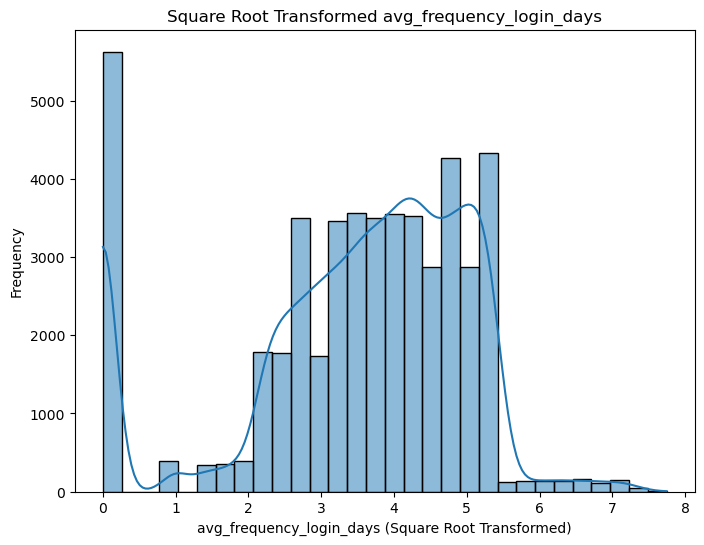

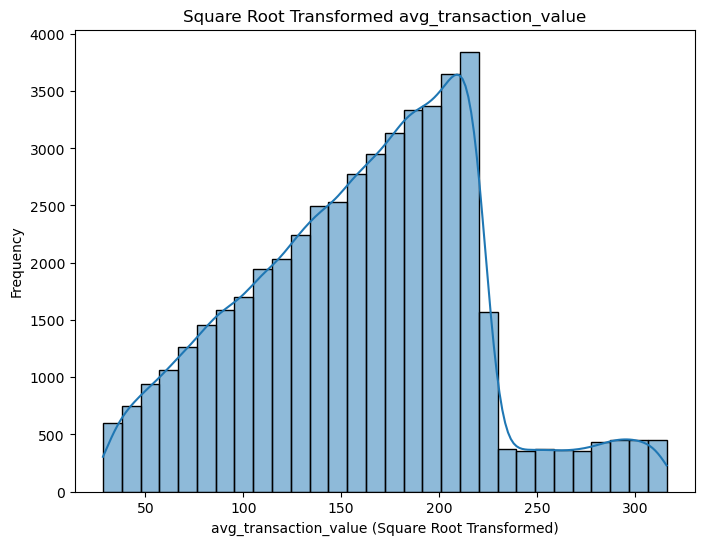

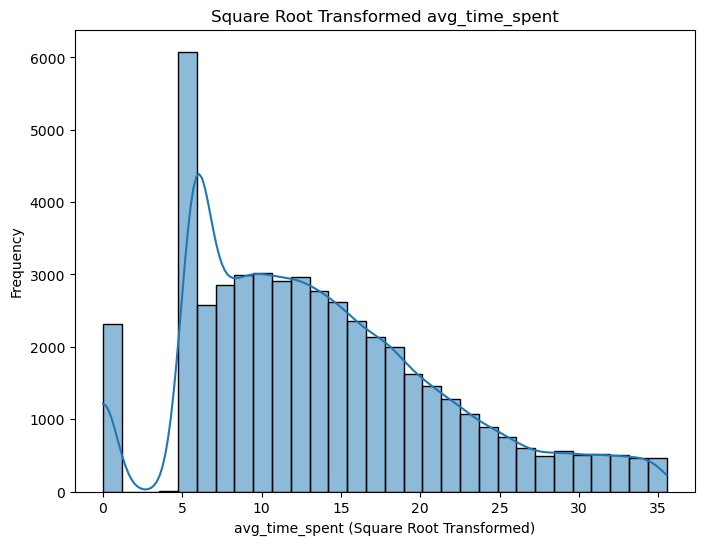

In [10]:
columns_to_sqrt_transform = ['avg_frequency_login_days', 'avg_transaction_value','avg_time_spent']

# Apply square root transformation
df[columns_to_sqrt_transform] = df[columns_to_sqrt_transform].apply(lambda x: np.sqrt(x))

# Plot the histograms for the transformed data
for column in columns_to_sqrt_transform:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Square Root Transformed {column}')
    plt.xlabel(f'{column} (Square Root Transformed)')
    plt.ylabel('Frequency')
    plt.show()

### Code Overview

This script is designed to identify **quasi-constant features** in a DataFrame and return the percentage of the most frequent value in those features. Quasi-constant features are columns where a single value dominates the majority of the data, which can reduce model performance because they offer little variance or useful information.

1. **Function to Identify Quasi-Constant Features**:
   - A custom function `identify_quasi_constant_features_with_percentage()` is defined to identify columns in the DataFrame (`df`) that are quasi-constant.
   - The function takes two arguments:
     - `df`: The DataFrame to analyze.
     - `quasi_constant_threshold` (default set to 0.1): This represents the threshold above which a feature will be considered quasi-constant. For instance, a threshold of 0.1 means that if a single value occurs in 90% or more of the rows, the column will be flagged as quasi-constant.

2. **Logic Behind the Function**:
   - For each column in the DataFrame:
     - `df[column].value_counts(normalize=True)` computes the frequency distribution of each unique value, normalizing the counts so that they sum to 1. This returns the proportion of each value in the column.
     - `unique_values.max()` retrieves the maximum frequency (i.e., the most frequent value's proportion).
   - If the most frequent value’s proportion exceeds or equals the quasi-constant threshold, the feature is considered quasi-constant, and the function stores the feature’s name and the corresponding percentage of its most frequent value.

3. **Return and Print Quasi-Constant Features**:
   - The function returns a dictionary (`quasi_constant_info`) where each key is a column name and its value is the percentage of its most frequent value.
   - The script then iterates over this dictionary, printing the feature name and the percentage of its most frequent value.

### Use Case

This analysis is crucial when preparing data for machine learning models because quasi-constant features:
- Contribute very little useful information for distinguishing between data points.
- Can potentially slow down or mislead the model, making it overfit to irrelevant patterns.

By identifying these features, you can either remove them from the dataset or decide whether to treat them differently.

In [11]:
import pandas as pd

# Function to identify quasi-constant features and their percentage
def identify_quasi_constant_features_with_percentage(df, quasi_constant_threshold=0.1):
    quasi_constant_info = {}
    
    for column in df.columns:
        # Calculate the unique values and their counts
        unique_values = df[column].value_counts(normalize=True)
        if len(unique_values) > 1:
            max_percentage = unique_values.max()
            if max_percentage >= quasi_constant_threshold:
                quasi_constant_info[column] = max_percentage * 100  # Store percentage

    return quasi_constant_info

# Identify quasi-constant features and their percentages in your DataFrame
quasi_constant_features_info = identify_quasi_constant_features_with_percentage(df)

# Display the results
print("Quasi-Constant Features and Their Percentages:")
for feature, percentage in quasi_constant_features_info.items():
    print(f"{feature}: {percentage:.2f}%")

Quasi-Constant Features and Their Percentages:
gender: 50.04%
joined_through_referral: 51.66%
avg_frequency_login_days: 11.52%
used_special_discount: 54.88%
offer_application_preference: 55.00%
feedback: 17.10%
churn_risk_score: 29.11%
region_category_City: 65.83%
region_category_Town: 61.80%
region_category_Unknown: 85.15%
region_category_Village: 87.22%
preferred_offer_types_Credit/Debit Card Offers: 66.58%
preferred_offer_types_Gift Vouchers/Coupons: 66.61%
preferred_offer_types_Without Offers: 66.81%
internet_option_Fiber_Optic: 66.72%
internet_option_Mobile_Data: 66.73%
internet_option_Wi-Fi: 66.56%
complaint_status_No Information Available: 87.53%
complaint_status_Not Applicable: 50.16%
complaint_status_Solved: 87.72%
complaint_status_Solved in Follow-up: 87.37%
complaint_status_Unsolved: 87.55%
membership_category_encoded: 20.76%
medium_smartphone: 52.48%
medium_desktop: 52.19%


### Code Overview

This script calculates and visualizes the **Variance Inflation Factor (VIF)** for a set of numerical and categorical features from a DataFrame. VIF helps identify multicollinearity among the features—when two or more features are highly correlated, which can lead to unreliable coefficients in regression models.

1. **Selected Columns**:
   - The variable `columns_to_check` contains a list of feature names from the DataFrame `df`. These columns include both numerical and encoded categorical variables. The columns chosen for VIF calculation might affect model performance if there is multicollinearity among them.

2. **VIF Calculation Function**:
   - The function `calculate_vif()` calculates the Variance Inflation Factor for each feature in the dataset.
   - **How VIF is calculated**:
     - For each column, we fit an Ordinary Least Squares (OLS) regression model where the column is treated as the dependent variable and the remaining columns are the independent variables.
     - The R-squared value (`rsquared`) is obtained from the model. The VIF is then calculated as:
       \[
       \text{VIF} = \frac{1}{1 - R^2}
       \]
     - A high VIF value (typically > 5 or > 10) indicates multicollinearity, meaning the feature can be linearly predicted using other features, potentially causing problems in modeling.

3. **Subset of DataFrame for VIF Calculation**:
   - A DataFrame `df_vif` is created that includes only the columns selected in `columns_to_check`.

4. **Calculating and Displaying VIF Results**:
   - The VIF values are calculated using the `calculate_vif()` function, and the results are stored in the `vif_results` DataFrame.
   - This DataFrame contains two columns:
     - `Feature`: The name of each feature.
     - `VIF`: The VIF value for that feature.
   - The results are printed for inspection.

5. **Plotting VIF Values**:
   - A bar plot is generated using `seaborn.barplot()` to visualize the VIF values for the selected features.
   - **Vertical Lines**:
     - A red dashed vertical line at `VIF = 5` indicates the point where multicollinearity starts becoming a concern.
     - An orange dashed vertical line at `VIF = 10` indicates a high level of multicollinearity, which could severely affect model performance.
   - The plot provides a visual representation of which features have problematic VIF values.

### Notes:
- **Interpretation of VIF**:
  - VIF values less than 5 generally indicate low multicollinearity.
  - VIF values between 5 and 10 suggest moderate multicollinearity, and further investigation might be required.
  - VIF values above 10 indicate strong multicollinearity, and such features should potentially be removed or transformed to reduce their impact on the model.

### Summary:
This script provides a systematic way to check for multicollinearity in your dataset, using VIF to identify highly correlated features. The visualization helps to quickly identify and assess which features might need further attention for model optimization.

                                           Feature       VIF
0                                              age  1.000382
1                                           gender  1.000376
2                          joined_through_referral  1.011933
3                            days_since_last_login  1.009556
4                                   avg_time_spent  1.138246
5                            avg_transaction_value  1.052909
6                         avg_frequency_login_days  1.017581
7                                 points_in_wallet  1.086872
8                            used_special_discount  3.350376
9                     offer_application_preference  3.349957
10                                        feedback  1.064695
11                            region_category_City       inf
12                            region_category_Town       inf
13                         region_category_Unknown       inf
14                         region_category_Village       inf
15                     m

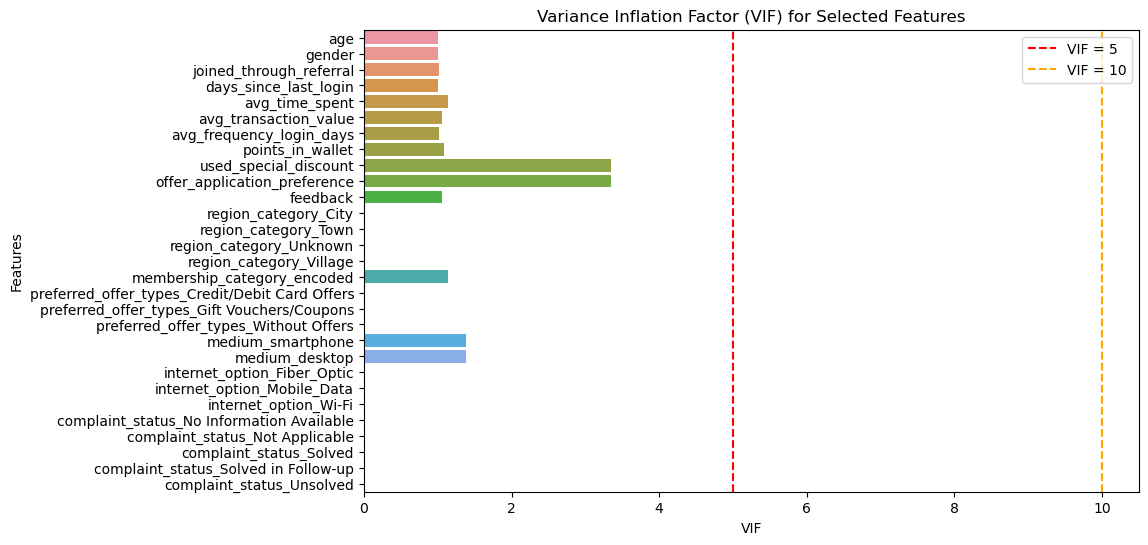

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Sample DataFrame
# df = pd.read_csv('your_data.csv')  # Load your dataset

# Select numerical columns for VIF calculation
# Replace this with your specific columns
columns_to_check = columns_to_check = ['age', 'gender', 'joined_through_referral',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'feedback', 'region_category_City', 'region_category_Town',
       'region_category_Unknown', 'region_category_Village',
       'membership_category_encoded',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_smartphone',
       'medium_desktop', 'internet_option_Fiber_Optic',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved']

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [sm.OLS(df[col], sm.add_constant(df.drop(col, axis=1))).fit().rsquared for col in df.columns]
    vif_data['VIF'] = 1 / (1 - vif_data['VIF'])
    return vif_data

# Create a DataFrame with only the selected columns
df_vif = df[columns_to_check]

# Calculate VIF
vif_results = calculate_vif(df_vif)

# Display the VIF results
print(vif_results)

# Plotting the VIF results
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_results)
plt.title('Variance Inflation Factor (VIF) for Selected Features')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10')
plt.legend()
plt.show()

In [13]:
# Create training set where 'column_name' has no null values
train_set = df[df['churn_risk_score'].notnull()]

# Create test set where 'column_name' has null values
test_set = df[df['churn_risk_score'].isnull()]

# Check the size of each set
print(f"Training set size: {train_set.shape}")
print(f"Test set size: {test_set.shape}")

Training set size: (31476, 30)
Test set size: (17351, 30)


### Code Overview

This script trains a **Random Forest Classifier** on a dataset to predict the `churn_risk_score`. It also extracts and visualizes feature importances, allowing for informed feature selection before splitting the data into training and validation sets.


1. **Prepare the Data**:
   - The first step drops any rows in the DataFrame `df` where the `churn_risk_score` is null. This ensures that all rows used in training the model have a valid target value.

2. **Separate Features and Target**:
   - Features (X) are separated from the target variable (y). The target variable here is `churn_risk_score`.


3. **Train the Random Forest Classifier**:
   - A Random Forest Classifier is instantiated and trained on the data.

4. **Get Feature Importances**:
   - After fitting the model, the importance of each feature is extracted from the trained model.

5. **Create a DataFrame for Feature Importances**:
   - A new DataFrame is created to store the feature names along with their importance scores. This DataFrame is then sorted in descending order of importance.


6. **Display Feature Importances**:
   - The script prints out the feature importances, providing insights into which features are most influential in predicting churn risk.


7. **Plot Feature Importances**:
   - A horizontal bar plot visualizes the feature importances, making it easier to see which features contribute the most to the model’s predictions. The y-axis is inverted so that the most important features appear at the top.

8. **Select Important Features**:
   - The script filters the features to keep only those with an importance score greater than a specified threshold (in this case, 0.03). The target variable `churn_risk_score` is included in the final DataFrame `df_important`.


9. **Split the Dataset into Training and Validation Sets**:
   - The remaining dataset is split into training and validation sets using `train_test_split`, ensuring that the split is stratified by the target variable to maintain the distribution of churn risk scores.

10. **Check the Sizes**:
    - Finally, the script prints the sizes of the training and validation sets to confirm that the split was successful.

### Summary

This script effectively demonstrates how to train a Random Forest model to predict customer churn risk, extract feature importance, and visualize the results. By focusing on important features, you can enhance the interpretability and performance of your predictive model. Additionally, the stratified split of the dataset ensures that the model is trained and validated on representative samples, which is crucial for reliable predictions.

                                           Feature  Importance
7                                 points_in_wallet    0.291802
26                     membership_category_encoded    0.230959
10                                        feedback    0.106610
5                            avg_transaction_value    0.085310
4                                   avg_time_spent    0.045304
6                         avg_frequency_login_days    0.042645
0                                              age    0.040165
3                            days_since_last_login    0.035213
1                                           gender    0.008028
27                               medium_smartphone    0.007301
28                                  medium_desktop    0.007255
2                          joined_through_referral    0.007251
22                 complaint_status_Not Applicable    0.006603
11                            region_category_City    0.006249
19                     internet_option_Mobile_Data    0

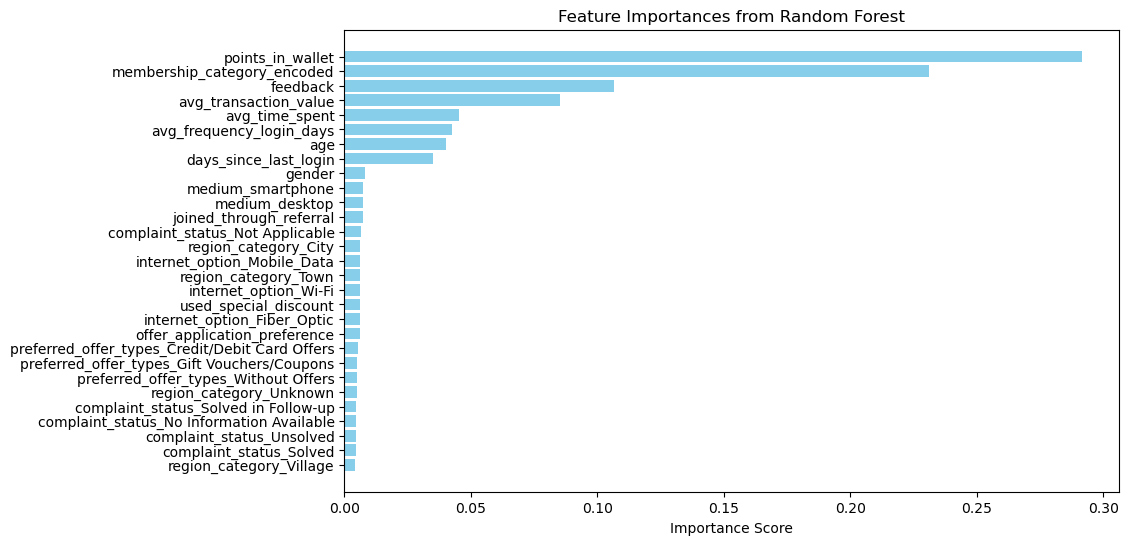

Training set size: (25180, 8)
Validation set size: (6296, 8)


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Prepare the data (assuming 'df' is your DataFrame)
# Drop rows where churn_risk_score is null if necessary
df = df.dropna(subset=['churn_risk_score'])

# Step 2: Separate the features (X) and the target (y)
X = df.drop('churn_risk_score', axis=1)  # Features (all columns except churn_risk_score)
y = df['churn_risk_score']               # Target (churn_risk_score)

# Step 3: Train a Random Forest Classifier to get feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Step 4: Get feature importances
importances = rf_model.feature_importances_

# Step 5: Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 6: Display the feature importances
print(feature_importances)

# Step 7: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Step 8: Based on the feature importances, you can decide which features to keep
# For example, keep only features with importance > 0.03 (adjust threshold as needed)
important_features = feature_importances[feature_importances['Importance'] > 0.03]['Feature']
df_important = df[important_features.tolist() + ['churn_risk_score']]  # Ensure target variable is included

# Step 9: Now you can proceed to split the dataset into training and validation sets
X_train_val = df_important.drop('churn_risk_score', axis=1)
y_train_val = df_important['churn_risk_score']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

# Check the sizes
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")


In [15]:
# Get the count of unique values for 'churn_risk_score' in training and validation sets
train_churn_counts = y_train.value_counts()
val_churn_counts = y_val.value_counts()

# Print the unique value counts
print("\nChurn risk score counts in training set:")
print(train_churn_counts)

print("\nChurn risk score counts in validation set:")
print(val_churn_counts)


Churn risk score counts in training set:
3.0    7329
4.0    7165
5.0    6899
2.0    1933
1.0    1854
Name: churn_risk_score, dtype: int64

Churn risk score counts in validation set:
3.0    1833
4.0    1791
5.0    1725
2.0     484
1.0     463
Name: churn_risk_score, dtype: int64


### Code Overview

In this section of the code, we filter the features based on their importance scores derived from the Random Forest model. We then create new DataFrames containing only the selected important features for the training, validation, and test sets.


1. **Filter Important Features**:
   - The code selects the features from the `feature_importances` DataFrame that have an importance score greater than 0.03. These features are stored in a list called `important_features`.

2. **Print Selected Important Features**:
   - The selected important features are printed to the console for verification.

3. **Create New DataFrames**:
   - New DataFrames are created for the training, validation, and test sets, containing only the selected important features. This step helps in focusing the model on the most relevant data, potentially improving performance and reducing complexity.


4. **Print the Shapes of the New DataFrames**:
   - The shapes of the newly created DataFrames are printed to provide insights into their sizes and ensure that the correct columns have been selected.

### Summary

This code snippet effectively filters the features based on their importance and creates streamlined DataFrames for training, validation, and test sets. This process enhances the focus on the most significant predictors, improving the efficiency and interpretability of subsequent modeling steps. By printing the shapes of the new DataFrames, you can confirm that the transformations were successful and that the correct number of features has been retained for model training and evaluation.

In [16]:
# Filter features with importance > 0.03
important_features = feature_importances[feature_importances['Importance'] > 0.03]['Feature'].tolist()

# Print selected important features
print("Selected important features:", important_features)

# Create new DataFrames for training, validation, and test sets with only important features
X_train_important = X_train[important_features]
X_val_important = X_val[important_features]
test_set_important = test_set[important_features]

# Print the shapes of the new DataFrames
print(f"Training set with important features size: {X_train_important.shape}")
print(f"Validation set with important features size: {X_val_important.shape}")
print(f"Test set with important features size: {test_set_important.shape}")


Selected important features: ['points_in_wallet', 'membership_category_encoded', 'feedback', 'avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days', 'age', 'days_since_last_login']
Training set with important features size: (25180, 8)
Validation set with important features size: (6296, 8)
Test set with important features size: (17351, 8)


### Code Overview

This code snippet demonstrates how to apply **SMOTE (Synthetic Minority Over-sampling Technique)** to address class imbalance in the training dataset. This is particularly useful when dealing with classification tasks where one class (e.g., churn risk) may be underrepresented compared to another.


1. **Import SMOTE**:
   - The code imports the `SMOTE` class from the `imblearn` library, which is used to generate synthetic samples of the minority class.

2. **Assume Data Preparation**:
   - It is assumed that `X_train_important` (the features) and `y_train` (the target) have already been defined and prepared prior to this step.

3. **Apply SMOTE**:
   - An instance of `SMOTE` is created with a specified random state for reproducibility. The `fit_resample` method is then used to generate synthetic samples for the minority class in the training dataset.

4. **Check Class Distribution**:
   - The class distribution of the target variable after applying SMOTE is checked. The counts of each churn risk score are displayed using a pandas Series.

5. **Optional: Print Shapes of Resampled Data**:
   - The shapes of the resampled feature set and target variable are printed to confirm the results of the resampling process.

### Summary

The SMOTE technique to balance the class distribution in the training dataset is essential for training a more robust classification model. By generating synthetic samples of the minority class, you help ensure that the model can learn more effectively from both classes. Checking the class distribution after resampling allows for immediate verification of the effectiveness of this approach, while printing the shapes of the resampled data provides insight into how the dataset has changed. This step is crucial in preparing for training the model, as it can lead to better performance and more reliable predictions.

In [17]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming important features have already been selected
# and X_train_important, y_train are already defined

# Step 1: Apply SMOTE only to the training set (X_train_important)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_important, y_train)

# Step 2: Check the class distribution after applying SMOTE
churn_risk_counts = pd.Series(y_train_resampled).value_counts()
print("Churn Risk Score Counts After SMOTE:")
print(churn_risk_counts)

# Optional: Print the shape of the resampled data
print(f"Resampled X_train shape: {X_train_resampled.shape}")
print(f"Resampled y_train shape: {y_train_resampled.shape}")


Churn Risk Score Counts After SMOTE:
1.0    7329
3.0    7329
4.0    7329
5.0    7329
2.0    7329
Name: churn_risk_score, dtype: int64
Resampled X_train shape: (36645, 8)
Resampled y_train shape: (36645,)


### Code Overview

This code snippet details the process of training a **Random Forest Classifier** on a resampled training dataset, making predictions on a validation set, and evaluating the model's performance. 

1. **Initialize the Random Forest Classifier**:
   - The model is created with specific parameters, including the number of trees (`n_estimators`), maximum depth of each tree (`max_depth`), and criteria for splitting nodes and leaves (`min_samples_split` and `min_samples_leaf`). Setting a random state ensures reproducibility.

2. **Train the Model**:
   - The model is trained using the resampled training set created with SMOTE. This step allows the classifier to learn patterns associated with the features and the target variable.

3. **Make Predictions**:
   - After training, predictions are made on the validation set using the trained model. This allows for assessing how well the model generalizes to unseen data.

4. **Evaluate Model Performance**:
   - Various performance metrics are calculated, including accuracy, precision, recall, and F1-score. These metrics provide insight into how effectively the model performs across different aspects, particularly in relation to the class distribution.

5. **Classification Report and Confusion Matrix**:
   - A classification report is generated, summarizing the precision, recall, and F1-score for each class. Additionally, a confusion matrix is computed, which displays the counts of true positives, true negatives, false positives, and false negatives.

6. **Plot the Confusion Matrix**:
   - The confusion matrix is visualized using a heatmap, which provides a clear representation of the model's performance across different classes.

7. **Print Metrics**:
   - The calculated performance metrics are printed to the console, offering a concise summary of the model's effectiveness.

### Summary

This provides a comprehensive approach to training and evaluating a Random Forest model on a churn prediction task. By utilizing resampled training data to address class imbalance, it enhances the likelihood of producing a robust and effective classifier. The use of various evaluation metrics and visualizations, such as the confusion matrix, helps in understanding the strengths and weaknesses of the model, ultimately guiding further improvements or adjustments in the modeling process.

Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      0.83      0.79       463
         2.0       0.81      0.75      0.78       484
         3.0       0.90      0.96      0.93      1833
         4.0       0.80      0.57      0.66      1791
         5.0       0.72      0.89      0.80      1725

    accuracy                           0.80      6296
   macro avg       0.80      0.80      0.79      6296
weighted avg       0.81      0.80      0.80      6296

Confusion Matrix:
[[ 384   78    1    0    0]
 [ 123  361    0    0    0]
 [   7    4 1752   70    0]
 [   1    1  188 1016  585]
 [   0    0    0  184 1541]]


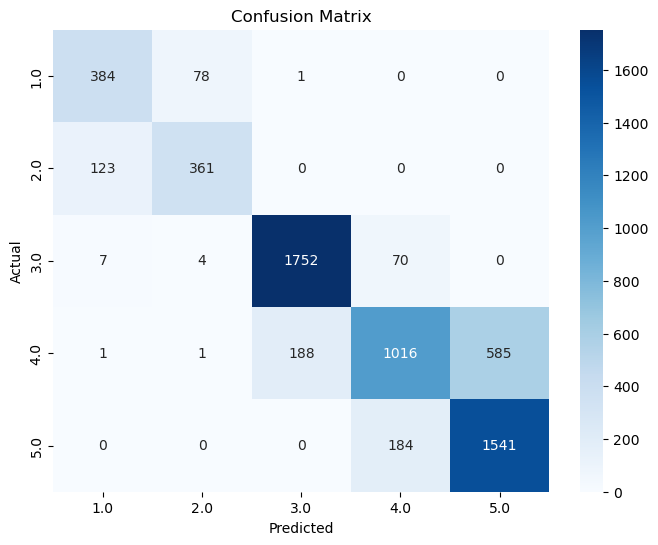

Accuracy: 0.8027
Precision: 0.8063
Recall: 0.8027
F1-Score: 0.7960


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=800, max_depth = 20, min_samples_split = 10,min_samples_leaf = 5,random_state=42)

# Step 2: Train the model using the resampled training set
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Make predictions on the validation set
y_val_pred = rf_model.predict(X_val_important)

# Step 4: Evaluate model performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 6: Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


### Code Overview

This code snippet outlines the steps taken to make predictions on a test dataset using a trained Random Forest Classifier. It also includes options to summarize and export the results.

1. **Prepare the Test Features**:
   - The code extracts features from the test dataset (`test_set_important`), specifically dropping the target variable `churn_risk_score` if it exists. This ensures that only the relevant features are used for predictions.

2. **Make Predictions**:
   - The trained Random Forest model (`rf_model`) is used to predict the churn risk scores for the test dataset. The output is stored in the variable `test_predictions`.

3. **Count Predictions**:
   - The code counts the occurrences of each unique predicted churn risk score in the test set using `pd.Series(value_counts())`. This step helps understand the distribution of predicted classes in the results.

4. **Display Counts**:
   - The counts of the predicted churn risk scores are printed to the console, providing a quick overview of how many customers fall into each churn risk category.

5. **Store Predictions**:
   - The predicted churn risk scores are added to the original test set as a new column named `predicted_churn_risk_score`. This allows for easy access and further analysis of the predictions alongside the original data.

6. **Export Predictions**:
   - Optionally, the predictions are exported to a CSV file named `test_set_churn_risk_predictions.csv`. This can be useful for sharing results or for further processing in other applications.

7. **Preview Predictions**:
   - Finally, the code displays the first few rows of the updated test set, allowing for a quick check of the predictions alongside the original data.

### Summary

This provides a straightforward approach to generating and handling predictions from a machine learning model. By preparing the test features, making predictions, summarizing results, and providing options for exporting, it ensures that the workflow is efficient and user-friendly. The integration of predicted churn risk scores with the original dataset enhances usability, making it easier to analyze and interpret the model's output.

In [21]:
X_test = test_set_important.drop('churn_risk_score', axis=1, errors='ignore')  # Remove target column if it exists
 
 
test_predictions = rf_model.predict(X_test)
 
# Step 3: Get the counts of each unique churn_risk_score in the test set predictions
test_churn_risk_counts = pd.Series(test_predictions).value_counts()
 
# Step 4: Print the predicted churn_risk_score counts for the test set
print("\nPredicted churn_risk_score counts in the test set:")
print(test_churn_risk_counts)
 
# Step 5: Optionally, you can store the predictions in a DataFrame for further use
test_set['predicted_churn_risk_score'] = test_predictions
 
# Step 6: Export the test predictions to a CSV file (optional)
test_set[['predicted_churn_risk_score']].to_csv('test_set_churn_risk_predictions.csv', index=False)
 
# If you want to see the first few predictions
print(test_set.head())


Predicted churn_risk_score counts in the test set:
5.0    5877
3.0    5344
4.0    3473
1.0    1544
2.0    1113
dtype: int64
                                      age  gender  joined_through_referral  \
customer_id                                                                  
fffe43004900440031003700300030003400   50       0                        0   
fffe43004900440031003900370037003300   41       1                        0   
fffe43004900440034003800360037003000   31       0                        0   
fffe43004900440036003200370033003400   64       1                        1   
fffe43004900440035003000370031003900   16       0                        1   

                                      days_since_last_login  avg_time_spent  \
customer_id                                                                   
fffe43004900440031003700300030003400                     12       19.653498   
fffe43004900440031003900370037003300                     11        6.148170   
fffe43004900

In [ ]:
#smote oversampling and dropped churn risk score for this model 